# __A Quick Overview of Predictive Distributions__

<br>

Finance 6470: Derivative Markets <br>
Tyler J. Brough <br>
Last Updated: March 30, 2021 <br>
<br>

Typically, the concept of a __predictive distribution__ is associated with Bayesian statistical methods. In a Bayesian model the answer to any problem of statistical
inference comes in the form of an entire distribution of outcomes rather than simply a _point estimate_ (a single numerical value). This is very nature for Bayesians 
because the only "estimator" in the Bayesian world is Bayes' Rule:

<br>

$$
p(\theta | x) \propto p(x | \theta) p(\theta)
$$

<br>

$p(\theta | x)$ is called the _posterior distribution_ and is obtained by taking the product of the _likelihood function_ (i.e. $p(x | \theta)$) and the _prior distribution_ (i.e. $p(\theta)$).

<br>

$p(\theta | x)$ is a probability density function (or many thousands of draws from one as a proxy). It represents infinitely many possible outcomes and their associated probability density. But the 
random variable(s) being modeled here is $\theta$ (possibly a vector). 

<br>

In finance, we are not primarily interested in any particular $\theta$'s but rather with future, but _uncertain_ $y$ values:

* What will the value of the investment portfolio be at retirement? 

* What will the value of the spot price be at delivery? 

* What will the value of the underlying be at maturity of the option contract? I.e. what will be the payoff of the option at expiry? 

* What will the settlement price of the futures contract? 

<br>

And on and on. In finance we care about forward-looking outcomes of random variables. 

<br>

Bayesian methods aid this objective by providing a _predictive distribution_ in the following way: 

<br>

$$
p(x^{\ast} | D) \propto \int\limits_{\Theta} p(x | \theta) p(\theta | D) d \theta
$$

<br>

where $x^{\ast}$ represents future values of $x$ as of yet unobserved, but anticipated and $D = \{x_{1}, x_{2}, \ldots, x_{N}\}$ (i.e. the observed data).

<br>

This is typically done by Monte Carlo simulation in any model beyond moderate complexity. 

<br>

This approach can be approximated for a _diffuse_ prior distribution $p(\theta)$ with classical statistical tools and Monte Carlo simulation. This is what Bollen and Whaley do with
their model of synthetic energy supply estimated via maximum likelihood and implemented with Monte Carlo simulation.

<br>

<br>
<br>

Consider the _simulating supply_ log-spot price model from Bollen & Whaley:

<br>
<br>

$$
\ln{ \left( \frac{S_{i,t}}{S_{i,t-1}} \right)} = \alpha_{i} (\beta_{i} - S_{i,t-1}) + \varepsilon_{i,t}
$$

<br>
<br>

Where $\varepsilon_{1}, \varepsilon_{2} \sim BVN(0,\sigma_{1}^{2}, 0, \sigma_{2}^{2}, \rho)$. For convenience we can rewrite this as:

<br>
<br>

$$
\ln{(S_{i,t})} = \ln{(S_{i,t-1})} + \alpha_{i} (\beta_{i} - S_{i,t-1}) + \varepsilon_{i,t}
$$

<br>
<br>

Let's implement this in a function that can return many thousand simulated paths as follows:

<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

from numpy import size, log, exp, pi, sum, diff, array, zeros, diag, mat, asarray, sqrt, copy
from numpy.linalg import inv

In [3]:
def simulated_supply(params, numObs=252, numReps=10000): 
    a1 = params[0]
    b1 = params[1]
    s1 = params[2]
    S1 = params[3]
    
    paths = np.empty((numReps, numObs))
    
    for i in range(numReps):
        paths[i,0] = np.log(S1)
        z = np.random.normal(size=numObs)
        
        for j in range(1, numObs):
            paths[i,j] = paths[i,j-1] + a1 * (b1 - exp(paths[i,j-1])) + z[j] * s1
            
    return paths

In [5]:
a1 = 0.342
b1 = 0.539
s1 = 0.11
S1 = 0.69
numObs = 45
numReps = 10
params = array([a1, b1, s1, S1])

paths = simulated_supply(params, numObs, numReps)

In [8]:
## let's look at the last column (i.e. simulated terminal prices)
paths[:,-1]

array([-0.84611654, -0.4938256 , -0.65396895, -0.5252673 , -0.55187282,
       -1.04313386, -0.93510929, -0.67616499, -0.62240371, -0.58191171])

In [9]:
## let's look at dollar prices
np.exp(paths[:,-1])

array([0.42907801, 0.61028721, 0.51997791, 0.59139726, 0.5758703 ,
       0.35234874, 0.39254296, 0.5085636 , 0.53665293, 0.55882902])

In [10]:
## now let's do many thousand reps
paths = simulated_supply(params)

In [11]:
## let's look at the first 10 rows of the last column
np.exp(paths[:,:10])

array([[0.69      , 0.67475875, 0.54457289, ..., 0.47508725, 0.54345388,
        0.59930819],
       [0.69      , 0.57823106, 0.64803434, ..., 0.55060227, 0.45638623,
        0.45946208],
       [0.69      , 0.80014303, 0.78214281, ..., 0.70772233, 0.63108399,
        0.68838526],
       ...,
       [0.69      , 0.61585421, 0.60198977, ..., 0.52558715, 0.51017534,
        0.59860225],
       [0.69      , 0.61068551, 0.60249455, ..., 0.59876384, 0.47028992,
        0.39611206],
       [0.69      , 0.61647036, 0.66352103, ..., 0.66626068, 0.73295236,
        0.66358197]])

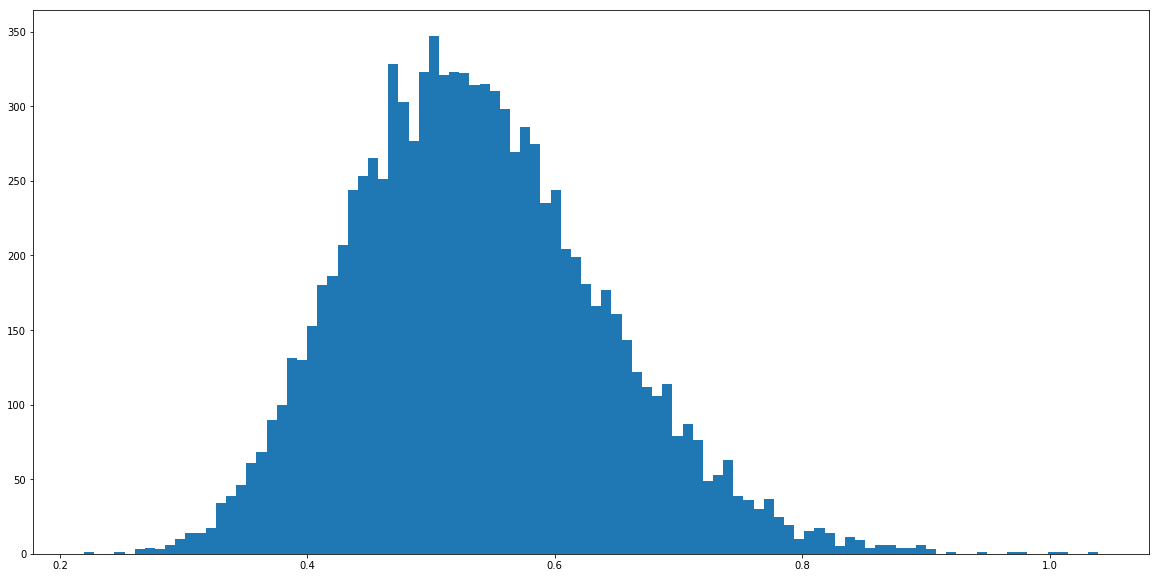

In [12]:
## let's plot a histogram
plt.hist(np.exp(paths[:,-1]), bins=100);

In [13]:
spotT = np.exp(paths[:,-1])

In [14]:
spotT.mean()

0.5371651138476731

In [15]:
spotT.std()

0.10243985816660209